# Задание 7

\begin{equation*}
 \begin{cases}
  sin(x-0.5y) = x-y^2
   \\
  (y+0.1)^2 + x^2 = 0.7
 \end{cases}
\end{equation*}

1) Графики функций $f(x,y)= 0, g(x,y)= 0$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt

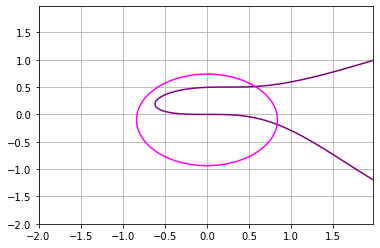

In [2]:
delta = 0.025
x = np.arange(-2, 2, delta)
y = np.arange(-2, 2, delta)
p, q = np.meshgrid(x, y)

f = lambda x, y: np.sin(x - 0.5*y) - x + y**2
g = lambda x, y: (y + 0.1)**2 + x**2- 0.7
z_1=f(p,q)
z_2 = g(p,q)

plt.contour(p, q, z_1 , [0], colors="purple")
plt.contour(p, q, z_2 , [0], colors="magenta")

plt.grid()
plt.show()

2) Уточнение начального приближения до тех пор, пока $||(x_k-x{k+1},y_k-y_{k+1})||>\varepsilon$, методом Ньютона

In [3]:
def Newton_method(xk, yk, eps, kmax, f, g, dfx, dfy, dgx, dgy):
    k = 0
    xx, yy, differ, val_f, val_g = [], [], [], [], []
    while True:

        xx.append(xk)
        yy.append(yk)
        val_f.append(f(xk, yk))
        val_g.append(g(xk, yk))

        D = dfx(xk, yk) * dgy(yk) - dgx(xk) * dfy(xk, yk)
        DX = f(xk, yk) * dgy(yk) - g(xk, yk) * dfy(xk, yk)
        DY = dfx(xk, yk) * g(xk, yk) - dgx(xk) * f(xk, yk)

        xk_1 = xk - DX / D
        yk_1 = yk - DY / D

        if k == 0:
            differ.append(' ')
        else:
            norma = sqrt((xx[k] - xx[k-1])**2 + (yy[k] - yy[k-1])**2)
            differ.append(norma)
            if norma < eps or k >= kmax:
                val = [xk, yk]
                break

        xk = xk_1
        yk = yk_1
        k += 1

    data = xx, yy, differ, val_f, val_g
    columns = [
        "$x_k$",
        "$y_k$",
        "$norma$",
        "$f(x_k, y_k)$",
        "$g(x_k, y_k)$"
    ]
    df = pd.DataFrame(data, columns).T
    df.columns.name = "$k$"
    return df, val

f = lambda x, y: np.sin(x - 0.5*y) - x + y**2
g = lambda x, y: (y + 0.1)**2 + x**2- 0.7
df_x = lambda x, y: np.cos(x - 0.5*y) - 1
df_y = lambda x, y: (-0.5)*np.cos(x - 0.5*y) +2*y
dg_x = lambda x : 2*x
dg_y = lambda y: 2*(y + 0.1)

eps = 0.00001
x_0, y_0 = 0.568 , 0.519
num = 5
table_1, value_1 = Newton_method(x_0, y_0, eps, num, f, g, df_x, df_y, dg_x, dg_y)
print("Полученное приближенное решение = ", value_1)
display(table_1)

eps = 0.00001
x_0, y_0 = 0.835 , -0.194
num = 5
table_2, value_2 = Newton_method(x_0, y_0, eps, num, f, g, df_x, df_y, dg_x, dg_y)
print("Полученное приближенное решение = ", value_2)
display(table_2)

Полученное приближенное решение =  [0.5722448096426793, 0.5103571723483016]


$k$,$x_k$,$y_k$,$norma$,"$f(x_k, y_k)$","$g(x_k, y_k)$"
0,0.568,0.519,,0.00499079,0.005785
1,0.572207,0.510467,0.00951365,6.18163e-05,9.05095e-05
2,0.572245,0.510357,0.000116179,1.07056e-08,1.34976e-08
3,0.572245,0.510357,2.06147e-08,3.33067e-16,6.66134e-16


Полученное приближенное решение =  [0.8323901860540492, -0.18441906278149434]


$k$,$x_k$,$y_k$,$norma$,"$f(x_k, y_k)$","$g(x_k, y_k)$"
0,0.835,-0.194,,0.00545,0.006061
1,0.832435,-0.184547,0.00979474,6.80534e-05,9.59369e-05
2,0.83239,-0.184419,0.000135599,1.16843e-08,1.83872e-08
3,0.83239,-0.184419,2.42692e-08,3.95517e-16,6.66134e-16
